In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scs
import warnings
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PHILLIPS.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     49 non-null     int64  
 1   unem     49 non-null     float64
 2   inf      49 non-null     float64
 3   unem_1   48 non-null     float64
 4   inf_1    48 non-null     float64
 5   unem_2   47 non-null     float64
 6   inf_2    47 non-null     float64
 7   cunem    48 non-null     float64
 8   cinf     48 non-null     float64
 9   cunem_1  47 non-null     float64
 10  cinf_1   47 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 4.3 KB


In [ ]:
df.head()

,year,unem,inf,unem_1,inf_1,unem_2,inf_2,cunem,cinf,cunem_1,cinf_1
0,1948,3.8,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1949,5.9,-1.2,3.8,8.1,NaN,NaN,2.1,-9.3,NaN,NaN
2,1950,5.3,1.3,5.9,-1.2,3.8,8.1,-0.6,2.5,2.1,-9.3
3,1951,3.3,7.9,5.3,1.3,5.9,-1.2,-2.0,6.6,-0.6,2.5
4,1952,3.0,1.9,3.3,7.9,5.3,1.3,-0.3,-6.0,-2.0,6.6


**PUNTO 1**

In [ ]:
X = df.unem
X = sm.add_constant(X)
y = df.inf

In [ ]:
model = sm.OLS(y,X)
resultados = model.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                    inf   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.616
Date:                Fri, 10 Dec 2021   Prob (F-statistic):              0.112
Time:                        13:09:05   Log-Likelihood:                -124.43
No. Observations:                  49   AIC:                             252.9
Df Residuals:                      47   BIC:                             256.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4236      1.719      0.828      0.4

**PUNTO 2**

In [ ]:
new_df = pd.concat([resultados.resid, resultados.resid.shift(1)], axis=1).dropna().rename({0:'u t',1:'u t-1'}, axis=1)

In [ ]:
X_resid = new_df['u t-1']
X_resid = sm.add_constant(X_resid)
y_resid = new_df['u t']

In [ ]:
model_resid = sm.OLS(y_resid, X_resid)
resultados_resid = model_resid.fit()
print(resultados_resid.summary())

                            OLS Regression Results                            
Dep. Variable:                    u t   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     24.34
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.10e-05
Time:                        13:09:05   Log-Likelihood:                -110.88
No. Observations:                  48   AIC:                             225.8
Df Residuals:                      46   BIC:                             229.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1134      0.359     -0.316      0.7

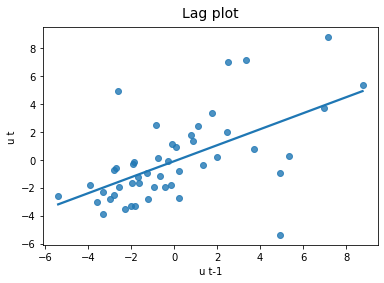

In [ ]:
plt.title('Lag plot', fontsize=14, pad=10)
sns.regplot(new_df['u t-1'], new_df['u t'], ci=False)

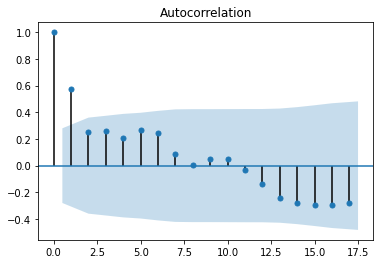

In [ ]:
plot_acf(resultados.resid)
plt.show()

En el primer gráfico se puede observar que hay una correlación lineal positiva entre el residual t y el residual rezagado t-1, es decir hay correlación serial de primer orden lo cual implica una violación al supuesto de errores no correlacionados.

En el segundo gráfico intentamos verificar si hay autocorrelación para aquellos rezagos mayores a 1. Al parecer sólo hay correlación serial de primer orden ya que la misma se encuentra por fuera del intervalo de confianza seteado al 95%.

La violación al supuesto de errores independientes/no correlacionados implica que los estimadores de OLS ya no son MELI y que los errores estándar y
los estadísticos de prueba ya no son más válidos, los últimos no se podrán usar más para pruebas de hipótesis. En aquellos casos cuando p > 0, se estará subestimando la varianza del estimador de OLS y, en consecuencia, un error estándar más chico significa un estadístico t mayor y un intervalo de confianza más acotado.

**PUNTO 3**

In [ ]:
np.round(durbin_watson(resultados.resid), 4)

0.8027

H0 = No hay correlación serial en los residuos.

H1 = Hay correlación serial en los residuos.

El estadístico de la prueba se encuentra cerca del 0, lo que impica que rechazamos la hipótesis nula debido a que hay suficiente evidencia estadística de que hay correlación serial positiva en los residuales.

 El valor de éste estadístico siempre se encontrará entre 0 y 4. Mientras más cercano al 0, más evidencia habrá de correlación serial positiva. Si el estadístico es igual a 2 entonces no hay autocorrelación. Entre más cercano al 4, más evidencia habrá de correlación serial negativa.